<h1>Introduction</h1>
<p>In these lab notes we will introduce you to Naïve Bayes and your task is to implement a relatively simple spam filter.  We will use a small data set to train and test the model (available on Blackboard). </p> 

<b>Note:</b>  Use Jupyter Notebook or Google Colab (NOT Jupyter Lab).
    
<p>The messages within the datasets have already been classified as spam, or ham (not spam). </p> 

<p>The implementation of a Naïve Bayes Spam Filter is relatively straight forward using scikit-learn, however, this library hides the implementation details (and many solutions are available on the Internet).  Therefore, this task does not permit the use of the scikit-learn library or similar libraries that perform similar tasks.  We hope that this will help with your understanding of the implementation details.</p> 
<p>Bayes Theorem can give us the probability that a message is spam S for a given event E</p>

<h1>
$P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$
</h1>

<p>Where:</p>
<p>$P\left(S\middle|\ E\right)$, the probability that the message is spam given the event occurred.</p>
<p>$P\left(S\right)$, the prior probability that a message is spam.</p>
<p>$P\left(\lnot S\right)$, the prior probability that a message is not spam.  </p>

Note:  $P\left(S\right)$ and $P\left(\lnot S\right)$ are prior values, or prior beliefs.  This value could be calculated using the number of spam and number of ham classifications in the data set.  You could also use arbitrary values, for example; you could assume that of all email messages sent, 80% of them are spam and 20% of them are not spam.  The success of the filter depends on the prior values.

<p>$P\left(E\middle|\ S\right)$, the probability that event E occurs in a spam emails.</p>

<p>$P\left(E|\lnot S\right)$, the probability that event E occurs in non-spam emails.</p>

<h3>Additional Libraries</h3>
<p>As you progress through the exercises you may need additional libraries that are not installed, for example when visualising the data you may need to import WordCloud.  If you use [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb) the necessary libraries will be available, which will save you having to pip install.  </p>
<h3>The Implementation</h3>
<p>We have tried to keep the implementation quite simple and therefore not accounted for things like filtering small often used words, nor does the implementation calculate probabilities of a word in the frequency list not appearing in spam.  We have also filtered things like telephone numbers, which could be used to identify spam.   The final exercise allows you to make recommendations how the model could be improved.    </p>


<h3>1.  Read the dataset into a dataframe and explore</h3>
<p>Start by importing pandas and read the dataset into a DataFrame named df.  Output the first 20 rows of the dataframe to get a general feel of how the data is structured.</p>
<p>You may encounter the error: UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 135-136: invalid continuation byte.  You don't need to edit the datafile,  as you should be able to successfully read in the datafile by changing the encoding to latin-1.</p>
<p>[1 Mark]</p>

In [1]:
import pandas as pd

df = pd.read_csv("spam.csv", encoding="latin-1")
df.head(20)

C:\Users\ghile\AppData\Local\Temp\ipykernel_34420\1815349674.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


<h3>2. Clean the data</h3>
<p>We are only interested in words, clean the data so that all punctuations are removed.  You should be left with a dataset that only contains alpha characters (including spaces).  You should also ensure all the words are lowercase.  Store the cleaned data into a DataFrame named clean.</p>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Category</th>
      <th>Message</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>ham</td>
      <td>go until jurong point crazy available only in ...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>ham</td>
      <td>ok lar joking wif u oni</td>
    </tr>
    <tr>
      <th>2</th>
      <td>spam</td>
      <td>free entry in  a wkly comp to win fa cup final...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>ham</td>
      <td>u dun say so early hor u c already then say</td>
    </tr>
    <tr>
      <th>4</th>
      <td>ham</td>
      <td>nah i dont think he goes to usf he lives aroun...</td>
    </tr>
  </tbody>
</table>

[1 Marks]

In [2]:
import string

columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df = df.drop(columns=columns_to_drop)
new_columns_names = {'v1':'Category', 'v2':'Message'}
df = df.rename(columns=new_columns_names)
df
new_text = []
new_category = []
for index, (text, classification) in enumerate(zip(df['Message'], df['Category'])):
    text = text.translate(str.maketrans('','', string.punctuation))
    text = text.lower()
    new_text.append(text)
    new_category.append(classification)
    
cleaned_data = {'Category': new_category,
               'Message': new_text}
clean = pd.DataFrame(cleaned_data)
clean
#for text, classification in df['Message'], df['Category']:
    #print(text)
    #print(classification)
    #text = text.translate(str.maketrans('','', string.punctuation))
    #text = text.lower()
    
    


,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ì b going to esplanade fr home
5569,ham,pity was in mood for that soany other suggest...
5570,ham,the guy did some bitching but i acted like id ...


<h3>3. Split the Data</h3>
<p>Split the data into three random samples, one for training the model, one for validation and the other for testing the model.  Create DataFrames named train_data, validation_data and test_data.  The train_data DataFrame should contain 60-70% of the data, validation_data 15-20% and the test_data DataFrame the remaining data.<p>  

<p>[1 Mark]</p>

In [3]:
train_data = clean.iloc[:3621]
validation_data = clean.iloc[3622:4645]
test_data = clean.iloc[4646:5571]
train_data.reset_index(drop=True, inplace=True)
validation_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)
test_data

,Category,Message
0,ham,god created gap btwn ur fingers so dat sum1 vr...
1,ham,we are okay going to sleep now later
2,ham,please protect yourself from ethreats sib neve...
3,ham,finally it has happened aftr decades beer is n...
4,spam,a å£400 xmas reward is waiting for you our com...
...,...,...
920,spam,reminder from o2 to get 250 pounds free call c...
921,spam,this is the 2nd time we have tried 2 contact u...
922,ham,will ì b going to esplanade fr home
923,ham,pity was in mood for that soany other suggest...


<h3>4. Create a Word Frequency DataFrame</h3>
<p>Create a new DataFrame named word_freq that contains each word with the number of times it appears in a spam and a ham message.  You should use the train_data.</p>
<p>Below is an example of what the DataFrame would look like, <i>note</i> that your values may differ depending on how the data was split.</p>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Word</th>
      <th>#Spam</th>
      <th>#Ham</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>go</td>
      <td>27</td>
      <td>196</td>
    </tr>
    <tr>
      <td>1</td>
      <td>until</td>
      <td>4</td>
      <td>17</td>
    </tr>
    <tr>
      <td>2</td>
      <td>jurong</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>3</td>
      <td>point</td>
      <td>1</td>
      <td>9</td>
    </tr>
    <tr>
      <td>4</td>
      <td>crazy</td>
      <td>4</td>
      <td>8</td>
    </tr>
    <tr>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <td>7253</td>
      <td>salesman</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7254</td>
      <td>pity</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7255</td>
      <td>soany</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7256</td>
      <td>suggestions</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7257</td>
      <td>bitching</td>
      <td>1</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
<p>[2 Marks]</p>

In [4]:
word_list = []
spam_numbers = []
ham_numbers = []
for index, (text, classification) in enumerate(zip(train_data['Message'], train_data['Category'])):
    split_text = text.split()
    for word in split_text:
        if word not in word_list:
            word_list.append(word)
        else:
            continue

for word in word_list: #Go thru every word in the word list
    #Example, word = go
    number_of_spam = 0
    number_of_ham = 0
    for index, (text, classification) in enumerate(zip(train_data['Message'], train_data['Category'])):
        split_text = text.split() #Create an array with all the words in the current message
        #Example, split_text = ['go', 'until', ...]
        for text1 in split_text: #Iterate thru the current message
            if word == text1: #If the word we're looking for is equal to current word
                if classification == 'spam':
                    number_of_spam += 1
                else:
                    number_of_ham += 1
    spam_numbers.append(number_of_spam)
    ham_numbers.append(number_of_ham)


word_freq_data = {'Word': word_list,
                 '#Spam': spam_numbers,
                 '#Ham': ham_numbers}
word_freq = pd.DataFrame(word_freq_data)
word_freq
    
            
            

,Word,#Spam,#Ham
0,go,20,157
1,until,5,17
2,jurong,0,1
3,point,0,11
4,crazy,2,7
...,...,...,...
7527,apology,0,1
7528,hustle,0,1
7529,forth,0,1
7530,audition,0,1


<h3>5. Visualise the Data</h3>
<p>Let's use a Word Cloud library to visualise the most common words contained in spam messages.</p>

[Example of a Word Cloud Image](https://drive.google.com/open?id=1lVRGHtMB1AMJf-JSi7MmcHbZB_BvBhGC)

<p>[1 Marks]</p>



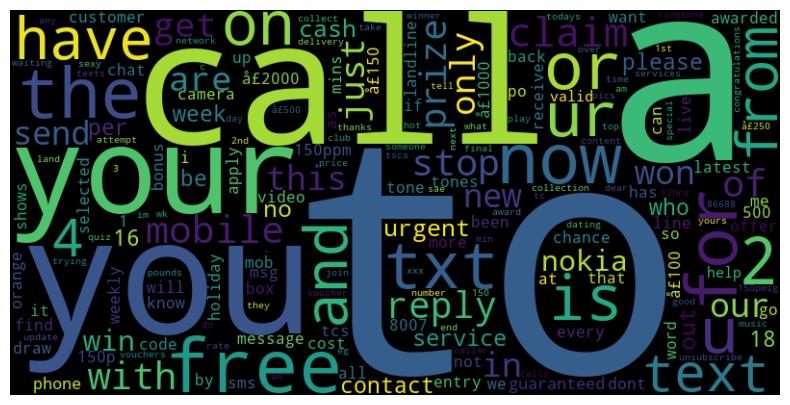

In [5]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud
spamwords_freq_dict = dict(zip(word_list, spam_numbers))
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(spamwords_freq_dict)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


<h3>6.  Calculate $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$</h3>
<p>Next create a new DataFrame named word_prob that gives the probability of each word being found in a spam and ham message.</p>
<p>To calculate the probability of a word being spam you divide the number of times the word was found in spam by the total number of spam messages, likewise to calculate the probability of each word being found in a ham message you divide the number of times the word was found in a ham message by the total number of ham messages.</p>
<p>If a word was not found in ham or spam it will cause problems later because the probability calculated will be zero. Therefore, use a pseudocount k and estimate the probability of seeing the word. This is known as smoothing and results in the following formula when k = 0.5, for example.</p>
<p>$P\left(E\middle| S\right)$ = (number of spams containing the word + k) / (total number of spam messages + 2 * k).</p>
<p>Likewise, for $P\left(E|\lnot S\right)$.</p>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Word</th>
      <th>P(E|S)</th>
      <th>P(E|¬S)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>go</td>
      <td>0.053322</td>
      <td>0.050055</td>
    </tr>
    <tr>
      <th>1</th>
      <td>until</td>
      <td>0.011364</td>
      <td>0.004275</td>
    </tr>
    <tr>
      <th>2</th>
      <td>jurong</td>
      <td>0.002622</td>
      <td>0.000138</td>
    </tr>
    <tr>
      <th>3</th>
      <td>point</td>
      <td>0.002622</td>
      <td>0.002344</td>
    </tr>
    <tr>
      <th>4</th>
      <td>crazy</td>
      <td>0.011364</td>
      <td>0.002344</td>
    </tr>
  </tbody>
</table>
</p>[2 Marks]</p>


In [6]:
#Calculate the total number of spam messages
#Go thru the word list using a for loop
#Iterate thru the train_data 
#Keep a count of how many spam messages the word appears in 
total_number_of_hams = 0
total_number_of_spams = 0
p_e_given_s_array = []
p_e_given_nots_array = []
k = 0.5
for msg in train_data['Category']:
    if msg == 'spam':
        total_number_of_spams += 1
    if msg == 'ham':
        total_number_of_hams += 1

for word in word_list:
    appearances_in_spam = 0
    appearances_in_ham = 0
    for index, (text, classification) in enumerate(zip(train_data['Message'], train_data['Category'])):
        if word in text:
            if classification == 'spam':
                appearances_in_spam += 1
            if classification == 'ham':
                appearances_in_ham += 1
    
    p_e_given_s = (appearances_in_spam + k) / (total_number_of_spams + (2 * k))
    p_e_given_s_array.append(p_e_given_s)
    p_e_given_h = (appearances_in_ham + k) / (total_number_of_hams + (2 * k))
    p_e_given_nots_array.append(p_e_given_h)
word_prob_data = {'Word': word_list,
                  'P(E|S)': p_e_given_s_array,
                  'P(E|¬S)': p_e_given_nots_array}
word_prob = pd.DataFrame(word_prob_data)
word_prob

,Word,P(E|S),P(E|¬S)
0,go,0.108025,0.214696
1,until,0.011317,0.005260
2,jurong,0.001029,0.000478
3,point,0.015432,0.006216
4,crazy,0.005144,0.002391
...,...,...,...
7527,apology,0.001029,0.000478
7528,hustle,0.001029,0.000478
7529,forth,0.001029,0.000478
7530,audition,0.001029,0.000478


<h3>7. Checking the 'spamliness' of a single word</h3>
<p>Now that we have trained the model, we will test the model.  Before we use the test_data, first let’s check how the model calculates the spamliness of a single word.  This is where we use the Bayes Theorem formula.  We have already calculated $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$, so we can just extract these values from the word_prob DataFrame.</p>
<p>We need to decide on the prior values $P\left(S\right)$ and $P\left(\lnot S\right)$, this is where you can experiment and tweak the model, in this example the prior value for spam was set to $0.4$ and the prior value for not spam or ham was set to $0.6$.</p>
<h3>
$P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$
</h3>
<pre>
Output
Word = ['free']
P(E|S) = [0.29108392]
P(E|¬S) = [0.01365141]
P(S|E) = [0.93427577]
P(¬S|E) = [0.06572423]
</pre>

<p>[2 Marks]</p>

In [7]:
p_s = 0.35 # P(S)
p_h = 0.65 # P(¬S)
spamliness = []
for i in range(0, len(p_e_given_s_array)):
    current_p_e_given_s = p_e_given_s_array[i] # P(E|S)
    current_p_e_given_h = p_e_given_nots_array[i] # P(E|¬S)
    current_p_s_given_e = (current_p_e_given_s * p_s) / ((current_p_e_given_s * p_s) + (current_p_e_given_h * p_h)) # P(S|E)
    spamliness.append(current_p_s_given_e)
spamliness_df_data = {'Word': word_list,
                      'Spamliness': spamliness}
spamliness_df = pd.DataFrame(spamliness_df_data)
spamliness_df.head(40)

,Word,Spamliness
0,go,0.213174
1,until,0.536724
2,jurong,0.536724
3,point,0.572061
4,crazy,0.536724
5,available,0.477708
6,only,0.724851
7,in,0.409662
8,bugis,0.210956
9,n,0.372304


<h3>8. Checking the 'spamliness' of several words</h3>
<p>To check the spamliness of several words contained in a message we multiply the probabilities.  The model assumes the words appear as independent events hence the naïve Bayes.  In reality of course, words are not independent events, but the model still performs well.  So we use the assumption that the words appear independently, and hence we multiply probabilities, so
$P(S\,|\, x_1,\dots,x_n)\approx \frac{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)}{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)+P(\neg S)\underset{i=1}{\overset{n}{\prod}}P(x_i | \neg S)}$

Calculate the probability for each word in a message being spam, you might want to store the calculations in a list named prob_spam.  Likewise create a list for each word not being spam.
Then multiply the probabilities and compare the results.  If the result of multiplying the probabilities for spam is greater than the result of multiplying the probabilities for not spam, then you assume the message as spam.
</p>
<p>If you have a word in your message that is not in the word_prob DataFrame then you can't get the probability.  Skip any words in the message that are not in the word_prob DataFrame.</p>
<p>[2 Marks]</p>

In [9]:
#Need to skip words that arent in the dataframe?
#Remove numbers from the dataframe
import numpy as np
probabilities_spam = []
for message in train_data['Message']: # Get the message, e.g. the first row
    split_message = message.split()
    big_array = []
    for word in split_message:
        current_row = word_prob[word_prob['Word'] == word]
        current_array = current_row.values
        big_array.append(current_array)
    p_given_s_array_2 = []
    p_given_nots_array_2 = []
    for array_element in big_array:
        p_given_s_array_2.append((array_element[0])[1])
        p_given_nots_array_2.append((array_element[0])[2])
    top_right = np.prod(p_given_s_array_2)
    bottom_right = np.prod(p_given_nots_array_2)
    current_message_prob = (p_s * top_right) / ((p_s * top_right) + (p_h * bottom_right))
    probabilities_spam.append(current_message_prob)
    

probabilities_not_spam = []
for message in train_data['Message']:
    split_message = message.split()
    big_array = []
    for word in split_message:
        current_row = word_prob[word_prob['Word'] == word]
        current_array = current_row.values
        big_array.append(current_array)
    p_given_s_array3 = []
    p_given_nots_array3 = []
    for array_element in big_array:
        p_given_s_array3.append((array_element[0])[1])
        p_given_nots_array3.append((array_element[0])[2])
    top_right = np.prod(p_given_nots_array3)
    bottom_right = np.prod(p_given_s_array3)
    current_message_prob = (p_h * top_right) / ((p_h * top_right) + (p_s * bottom_right))
    probabilities_not_spam.append(current_message_prob)


KeyboardInterrupt: 

<h3>9. Avoiding floating point underflow</h3>
<p>Our aim is to compare two probabilities $P(S|x_1,\dots,x_n)$ with $P(\neg S|x_1,\dots,x_n),$ according to our model introduced in Section 8, both probabilities share a common denominator which does not affect comparison. Hence we will calculate numerators only, which are proportional to $P(S|x_1,\dots,x_n)$ and $P(\neg S|x_1,\dots,x_n).$
</p>

<p>Multiplying a set of small probabilities could result in a floating-point error.  This is where the product becomes too small to be represented correctly.  To avoid this we can take the logarithm of the probabilities and add them.  

To avoid multiplication of small numbers, we use the following property of $\log(x):$</p>
$$
\log(a\cdot b)=\log(a)+\log(b)
$$
<p>i.e. the log of the product is equal to the sum of logs (so instead of multiplying small numbers we will add them):</p>
$$
P(S|x_1,x_2,\dots,x_n)\propto P(S)\cdot P(x_1|S)\cdot \dots \cdot P(x_n|S)$$
<p>becomes</p>
$$\log(P(S|x_1,x_2,\dots,x_n))\propto \log\left(P(S)\cdot P(x_1|S)\cdot \dots  P(x_n|S)\right)=$$ $$
\log(P(S))+\log(P(x_1|S))+\dots+\log(P(x_n|S))
$$
<p>So, to check spam or ham we just compare:</p>
$$
\log(P(S))+\log(P(x_1|S))+\dots+\log(P(x_n|S))
$$
<p>and </p>
$$
\log(P(\neg S))+\log(P(x_1|\neg S))+\dots+\log(P(x_n|\neg S))
$$


Change the equation so that logs are used.
</p>
<p>[2 Mark]</p>

In [22]:
#def classify(dataframe):
    #log_spam = []
    #log_ham = []
    #for message in dataframe['Message']:
   #     split_message = message.split()
  #      big_array = []
 #       for word in split_message:
#            current_row = 






def classify(dataframe):
    log_spam = []
    log_ham = []
    print(len(dataframe['Message']))
    for message in dataframe['Message']:
        split_message = message.split() # Splits the current message into an array of words
        big_array = []
        for word in split_message:
            current_row = word_prob[word_prob['Word'] == word] # Finds the row with the word and its probabilities
            current_array = current_row.values # Turns the row into an array of the three values it contains: [Word, P(xi|S), P(xi|notS)]
            big_array.append(current_array) # Adds to big array
        
        p_given_s_array_2 = []
        p_given_nots_array_2 = []
        for array_element in big_array:
            if len(array_element) > 0:
                p_given_s_array_2.append((array_element[0])[1]) # Adds
                p_given_nots_array_2.append((array_element[0])[2])
        top_right = np.prod(p_given_s_array_2) 
        top_right2 = top_right * p_s
        bottom_right = np.prod(p_given_nots_array_2)
        bottom_right2 = bottom_right * p_h
        #current_message_prob = (p_s * top_right) / ((p_s * top_right) + (p_h * bottom_right))
        #probabilities_list.append(current_message_prob)
        log_spam_element = np.log10(top_right2)
        log_spam.append(log_spam_element)
        log_ham_element = np.log10(bottom_right2)
        log_ham.append(log_ham_element)
    print(f"Log spam size: {len(log_spam)}")
    print(f"Log ham size: {len(log_ham)}")
    return log_spam, log_ham
            
        


log_spam, log_ham = classify(train_data)


3621


KeyboardInterrupt: 

<h3>10. Testing the Model</h3>
<p>Now that we have tested the model using simple messages.  Let’s test the model using the messages from the test_set.  You should implement counters that displays how your model has performed and calculate the accuracy of the model.</p>
<pre>
match_spam 173
match_ham 843
thought_ham_is_spam 3
thought_spam_is_ham 357
Accuracy: 0.7383720930232558
</pre>
<p>[3 Marks]</p>


In [23]:

log_spam, log_ham = classify(test_data)


match_spam = []
match_ham = []
thought_spam_is_ham = 0
thought_ham_is_spam = 0
counter = 0
print("")
print("")
print("")
print("")
print("")
print("")


for prob_spam, prob_ham in zip(log_spam, log_ham):
    if counter < len(test_data['Message']):
        if prob_spam > prob_ham:
            match_spam.append((test_data['Message'])[counter])
        else:
            match_ham.append((test_data['Message'])[counter])
        counter += 1
    else:
        break
    
for message, category in zip(test_data['Message'], test_data['Category']):
    if category == 'ham' and message in match_spam:
        thought_ham_is_spam += 1
    if category == 'spam' and message in match_ham:
        thought_spam_is_ham += 1

spam_counter = len(match_spam)
ham_counter = len(match_ham)
accuracy = (spam_counter + ham_counter) / (spam_counter + ham_counter + thought_spam_is_ham + thought_ham_is_spam)
print(f"match_spam: {spam_counter}")
print(f"match_ham: {ham_counter}")
print(f"thought_ham_is_spam: {thought_ham_is_spam}")
print(f"thought_spam_is_ham: {thought_spam_is_ham}")
print(f"Accuracy for test_data: {accuracy}")

925
Log spam size: 925
Log ham size: 925
log spam: [-60.1297450523369, -12.907301832187402, -33.697924128429946, -31.898601635660555, -24.398831699346708, -8.728981145398746, -13.693709311640736, -9.453073633855455, -21.655079523438587, -7.015356853032756, -19.988043824867308, -23.96858953099293, -13.936865505094026, -15.44980144657993, -4.6710142423320375, -8.55741939858952, -7.758468852629806, -8.703391644659337, -13.022117376440741, -5.109045190768354, -2.588988609344306, -16.290532704231094, -22.74475809097464, -14.72276934493606, -18.42338151122996, -24.839207522928323, -37.17230301754834, -9.161353783448261, -35.110773560218476, -8.092516096915018, -2.4474866451763, -11.827839397236135, -9.74326645764845, -22.877994615227898, -6.968289485793265, -15.112172053839496, -11.92932092500192, -46.110120079777694, -16.886167384371948, -12.373240093895626, -8.057202914410954, -6.738526371040315, -13.44792953786119, -4.6710142423320375, -11.65352651014118, -41.94434473629884, -36.689840562

<h3>11. Improvements</h3>
<p>Utilise the validation set to assess the performance of various word sets in classifying spam and non-spam (ham) emails. Compare the effectiveness of different sets of words to determine their impact on classification accuracy.</p>
<p>[3 Mark]</p>

In [24]:
log_spam, log_ham = classify(validation_data)


match_spam = []
match_ham = []
thought_spam_is_ham = 0
thought_ham_is_spam = 0
counter = 0
print("")
print("")
print("")
print("")
print("")
print("")


for prob_spam, prob_ham in zip(log_spam, log_ham):
    if counter < len(test_data['Message']):
        if prob_spam > prob_ham:
            match_spam.append((test_data['Message'])[counter])
        else:
            match_ham.append((test_data['Message'])[counter])
        counter += 1
    else:
        break
    
for message, category in zip(test_data['Message'], test_data['Category']):
    if category == 'ham' and message in match_spam:
        thought_ham_is_spam += 1
    if category == 'spam' and message in match_ham:
        thought_spam_is_ham += 1

spam_counter = len(match_spam)
ham_counter = len(match_ham)
accuracy = (spam_counter + ham_counter) / (spam_counter + ham_counter + thought_spam_is_ham + thought_ham_is_spam)
print(f"match_spam: {spam_counter}")
print(f"match_ham: {ham_counter}")
print(f"thought_ham_is_spam: {thought_ham_is_spam}")
print(f"thought_spam_is_ham: {thought_spam_is_ham}")
print(f"Accuracy for validation data: {accuracy}")

1023
Log spam size: 1023
Log ham size: 1023
log spam: [-12.775585806248584, -9.74858561869771, -18.804660188703636, -18.20338778501006, -18.104628478562155, -19.025997472687788, -11.143659443278144, -36.64463182710742, -8.887262100630156, -11.829591007066266, -1.7171711741201705, -15.748321375959861, -53.10620724621805, -24.63551540132067, -13.133092343814086, -24.839207522928323, -10.002282738482004, -33.69266961334492, -22.72069325001329, -40.22591145430127, -27.82135436056181, -7.9178187925329775, -28.741232785489835, -25.605388938526794, -16.467348892427896, -34.258432161628654, -15.539718335015257, -18.652039109531092, -8.874097187227882, -15.484555670103102, -15.45057184242815, -8.533078844415254, -8.242839491372868, -18.989726987917905, -11.29977818610987, -15.539723042182406, -8.108992722779524, -11.0868726664823, -9.121840539786321, -33.13236119102813, -25.403543649587903, -14.921294486742886, -9.725813444539941, -52.70859697693224, -35.421264622904665, -9.801048997222923, -22

The accuracy for the test set was 0.785..., and the accuracy for the validation data was 0.708..., so changing the set of data reduced the accuracy by less than 0.08, so with this data in mind, its fair to say that the model is fairly accurate for different sets of data